# TOPIC MODELING OF CELEBRITY TWEETS

Dataset source: https://www.kaggle.com/speckledpingu/RawTwitterFeeds

R Notebook: https://www.kaggle.com/donyoe/famous-people-twitter-analisys

### Related topics:
https://www.analyticsvidhya.com/blog/2017/10/essential-nlp-guide-data-scientists-top-10-nlp-tasks/

https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#from sklearn.grid_search import GridSearchCV
%matplotlib inline

In [2]:
mydata = pd.read_csv("alltweets.csv")
mydata = mydata.sample(n=20000)
print(mydata.columns, mydata.shape)
mydata.head(10)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'id', 'link', 'retweet', 'text',
       'author', 'author_num'],
      dtype='object') (20000, 9)


Unnamed: 0  Unnamed: 0.1        date            id  \
53567        9038          9038   2/27/2010  9.741943e+09   
86961        8776          8776    4/5/2020  7.174580e+17   
63233        8016          8016  12/12/2011  1.463520e+17   
15428        1229          1229   2/21/2020  7.014370e+17   
52864        8335          8335    8/4/2010  2.030402e+10   
86914        8729          8729    4/6/2020  7.177340e+17   
22322        8126          8126   2/21/2014  4.370880e+17   
65828       10611         10611  12/14/2010  1.466720e+16   
70136       14919         14919   3/24/2009  1.382602e+09   
25268       11072         11072   4/16/2013  3.242450e+17   

                                             link  retweet  \
53567            /KimKardashian/status/9741942670    False   
86961   /jonathanhanlon/status/717458389350031360    False   
63233             /NASA/status/146351749186322432    False   
15428  /realDonaldTrump/status/701437415047700482    False   
52864           /KimKardashian/status/20304017219    False   
86914        /kdnuggets/status/717733666210889728    False   
22322  /realDonaldTrump/status/437087873645682688     True   
65828              /NASA/status/14667197985071104    False   
70136                     /NASA/status/1382601706    False   
25268  /realDonaldTrump/status/324244756928552961    False   

                                                    text         author  \
53567    Pray for the people in Chile!! #prayersforchile  KimKardashian   
86961  @EXAGolo @kdnuggets Not just here to stay - al...        various   
63233  NASA's Dawn spacecraft successfully maneuvered...           NASA   
15428  Thank you South Carolina!https://twitter.com/A...    DonaldTrump   
52864  RT @ihatequotes Everything happens for a reaso...  KimKardashian   
86914  VisuAlgo - visualising #data structures and #a...        various   
22322  "@tnaps85: If Donald Trump is our next preside...    DonaldTrump   
65828  Happy birthday to @Astro_Cady Coleman. On Dec....           NASA   
70136  You can now see the entire Presidential space ...           NASA   
25268  Vegas’ top destination, @TrumpLasVegas is a 64...    DonaldTrump   

       author_num  
53567           7  
86961          11  
63233           8  
15428           4  
52864           7  
86914          11  
22322           4  
65828           8  
70136           8  
25268           4

In [3]:
# Drop the unnecessary columns
# Note: you can only run it once without an error
mydata = mydata.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
mydata.head(5)

date            id                                        link  \
53567   2/27/2010  9.741943e+09            /KimKardashian/status/9741942670   
86961    4/5/2020  7.174580e+17   /jonathanhanlon/status/717458389350031360   
63233  12/12/2011  1.463520e+17             /NASA/status/146351749186322432   
15428   2/21/2020  7.014370e+17  /realDonaldTrump/status/701437415047700482   
52864    8/4/2010  2.030402e+10           /KimKardashian/status/20304017219   

       retweet                                               text  \
53567    False    Pray for the people in Chile!! #prayersforchile   
86961    False  @EXAGolo @kdnuggets Not just here to stay - al...   
63233    False  NASA's Dawn spacecraft successfully maneuvered...   
15428    False  Thank you South Carolina!https://twitter.com/A...   
52864    False  RT @ihatequotes Everything happens for a reaso...   

              author  author_num  
53567  KimKardashian           7  
86961        various          11  
63233           NASA           8  
15428    DonaldTrump           4  
52864  KimKardashian           7

In [4]:
mydata["date"].describe()

count         20000
unique         2871
top       7/28/2020
freq             48
Name: date, dtype: object

In [5]:
#Convert date to datetime
mydata["date"] = mydata["date"].astype("datetime64", errors='ignore')
mydata["date"].head()

53567   2010-02-27
86961   2020-04-05
63233   2011-12-12
15428   2020-02-21
52864   2010-08-04
Name: date, dtype: datetime64[ns]

In [6]:
df1 = mydata.groupby(mydata['date'].dt.date).size().reset_index(name='Count')
print(df1.columns, df1.shape)

Index(['date', 'Count'], dtype='object') (2871, 2)


C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 2871 artists>

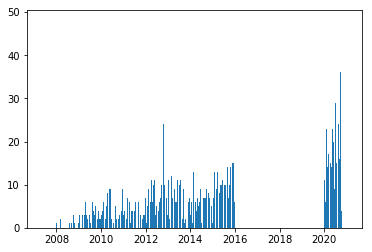

In [7]:
plt.bar(df1["date"], df1["Count"])

In [8]:
print(mydata["author"].value_counts())

DonaldTrump        3896
NASA               3666
KimKardashian      2445
various            2321
FiveThirtyEight    2187
BarackObama        1565
RichardDawkins     1262
AdamSavage         1119
HillaryClinton      717
deGrasseTyson       526
ScottKelly          296
Name: author, dtype: int64


In [9]:
print(mydata["retweet"].value_counts())

False    19173
True       827
Name: retweet, dtype: int64


In [10]:
mydata.columns

Index(['date', 'id', 'link', 'retweet', 'text', 'author', 'author_num'], dtype='object')

### Text Preprocessing

We want the text to be processable and analyzable. Therefore, 

In [11]:
import re

def clean_text(string_in):
    string_in = re.sub(r"@\w+", "", string_in) # Remove twitter handle
    string_in = re.sub(r"\d", "", string_in) # Remove numbers  
    string_in = re.sub(r"_+", "", string_in) # Remove consecutive underscores
    string_in = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', string_in) # remove URLs
    string_in = string_in.lower() # Tranform to lower case    
    string_in = re.sub('@[^\s]+', 'AT_USER', string_in) # remove usernames
    string_in = re.sub(r'#([^\s]+)', r'\1', string_in) # remove the # in #hashtag
    return string_in.strip()

mydata["tweet_text_cleaned"] = mydata.text.apply(clean_text)
print(mydata["tweet_text_cleaned"])

53567       pray for the people in chile!! prayersforchile
86961    not just here to stay - already having an effe...
63233    nasa's dawn spacecraft successfully maneuvered...
15428                       thank you south carolina!url …
52864    rt  everything happens for a reason, whether i...
86914    visualgo - visualising data structures and alg...
22322    ": if donald trump is our next president, amer...
65828    happy birthday to  coleman. on dec.  she launc...
70136    you can now see the entire presidential space ...
25268    vegas’ top destination,  is a -story tower of ...
47965                          thrilled to see bernard url
55072                          just touched down in nyc!!!
78545    rt  datascience basics:  insights for beginner...
81543    what the next generation of iot sensors have i...
24245    ":  i bet the russian leaders wouldn't taunt y...
57786    padalka's  days makes his total  days in space...
39204    the superbowl excitement index isn't perfect, .

In [12]:
from nltk.tokenize import RegexpTokenizer
preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                         tokenize(mydata.tweet_text_cleaned[idx])) \
                for idx in mydata.index]
print(preprocessed)

['pray for the people in chile prayersforchile', 'not just here to stay already having an effect new look grocery store built on msft ioturl', 'nasa s dawn spacecraft successfully maneuvered into its closest orbit around the giant asteroid vesta url', 'thank you south carolina url', 'rt everything happens for a reason whether it s good or bad believe that it s always the best from god be thankful', 'visualgo visualising data structures and algorithms through animation url', 'if donald trump is our next president america will be saved ith and all will be well in the world amen and alleliua true', 'happy birthday to coleman on dec she launches to join the expedition space station crew url', 'you can now see the entire presidential space call at url', 'vegas top destination is a story tower of golden glass url what goes on there stays there', 'thrilled to see bernard url', 'just touched down in nyc', 'rt datascience basics insights for beginners url via url pic twitter com xumdkjtuw', 'wh

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

custom_stop_words = []
my_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = my_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Created document-term matrix of size %d x %d" % (tfidf.shape[0],tfidf.shape[1]))

Created document-term matrix of size 20000 x 24513


In [14]:
from sklearn import decomposition
import numpy as np
nmf = decomposition.NMF(init = 'nndsvd', n_components = 3, max_iter = 200) # n_components = num of topics
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Generated factor W of size %s and factor H of size %s" % ( str(W.shape), str(H.shape)))

feature_names = vectorizer.get_feature_names()
n_top_words = 15 # determine number of words in each topic

# Print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Generated factor W of size (20000, 3) and factor H of size (3, 24513)
Topic #0:
twitter com pic url trump today yearinspacepic thank new happy look clinton hillary year like

Topic #1:
url data datascience nasa science bigdata rt kdn learning space analytics new machinelearning big watch

Topic #2:
president obama trump america run make people donald great country just don vote time thanks



In [15]:
# Create pandas dataframe for the topics
mydf = pd.DataFrame({"feature_name": feature_names})

for topic_idx, topic in enumerate(H):
    mydf["topic_" + str(topic_idx)] = topic

mylist = list(mydf.itertuples())

mywords_topic1 = []
mywords_topic2 = []
mywords_topic3 = []

for order_id, key, num1, num2, num3 in mylist:
    mywords_topic1.append((key, num1))
    mywords_topic2.append((key, num2))
    mywords_topic3.append((key, num3))

mywords_topic1 = sorted(mywords_topic1, key=lambda myword: myword[1], reverse=True)
mywords_topic2 = sorted(mywords_topic2, key=lambda myword: myword[1], reverse=True)
mywords_topic3 = sorted(mywords_topic3, key=lambda myword: myword[1], reverse=True)
print(mywords_topic1)
print(mywords_topic2)
print(mywords_topic3)

[('twitter', 2.2449878446076874), ('com', 2.2335293627954953), ('pic', 2.12112007239956), ('url', 0.609846253695424), ('trump', 0.11382255446339584), ('today', 0.11319716516391506), ('yearinspacepic', 0.0993017671538948), ('thank', 0.09559040503296423), ('new', 0.08955147891567365), ('happy', 0.08679778256401942), ('look', 0.08567842175354343), ('clinton', 0.0856392649868983), ('hillary', 0.07867488972992719), ('year', 0.07645431227626374), ('like', 0.07269340268113551), ('know', 0.07212980346698658), ('et', 0.07049874942784996), ('time', 0.0670762736500185), ('americans', 0.06681998322657148), ('women', 0.06446250268388827), ('rt', 0.06126523740171831), ('night', 0.06010363011206508), ('great', 0.05887073760642005), ('day', 0.05404665751950914), ('nfl', 0.05352127486773494), ('earth', 0.053226388421274605), ('election', 0.052992164470898606), ('isn', 0.05297913978536542), ('planet', 0.0524235852604244), ('best', 0.05241404808721268), ('pluto', 0.052161177056355756), ('yearinspace', 0.

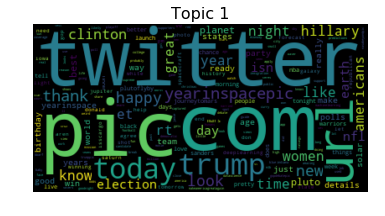

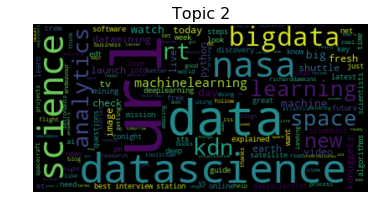

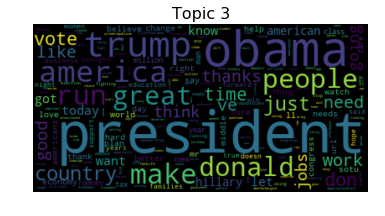

In [16]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

%matplotlib inline

def draw_wordcloud(dict, topic_number):
    wc = WordCloud(max_words=1000)    
    wordcloud = WordCloud().generate_from_frequencies(dict)
    
    plt.title('Topic %s' %str(topic_number), size = 16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

draw_wordcloud(dict(mywords_topic1), topic_number=1)
draw_wordcloud(dict(mywords_topic2), topic_number=2)
draw_wordcloud(dict(mywords_topic3), topic_number=3)

In [17]:
# Prediction example
text_new = preprocessed[0:5]
tfidf_new = vectorizer.transform(text_new)
W_new = nmf.transform(tfidf_new)
W_new

array([[0.00028359, 0.        , 0.01120267],
       [0.00197756, 0.00862072, 0.00884905],
       [0.00068102, 0.02668305, 0.        ],
       [0.00523841, 0.03085692, 0.00483552],
       [0.0012406 , 0.01634207, 0.01510764]])

In [18]:
x = mydata["text"]
y = mydata["author"]

In [19]:
#Vectorize Reviews

vocab = CountVectorizer(analyzer=clean_text).fit(x)
x = vocab.transform(x)
x

<20000x138 sparse matrix of type '<class 'numpy.int64'>'
	with 478051 stored elements in Compressed Sparse Row format>

In [20]:
# Splitting into Test & Train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [21]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 30   2  50  38   2  34  37  12   7   2  15]
 [  5 125  59  57   2   2  53   1   4   2  16]
 [  9  36 540  10   5  39  53  43   3   5  18]
 [  2  10  40 304   1   2  49   7   1   1  31]
 [  2  23  22  23  20   1  17   8   3   1   7]
 [ 13   0  70  42   1 306  37  14   5   1  13]
 [  5  21 116 157   2  27 329  20   4   3  46]
 [  4  10  66   3   5   3  31  95   0   8  24]
 [  6   0   6  11   0   4   8   2  23   0   0]
 [  4   7  65   4   0   0  22   1   0   4   3]
 [  4   3  27  60   0   8  55   9   2   3 287]]
Score: 51.58
Classification Report:                  precision    recall  f1-score   support

     AdamSavage       0.36      0.13      0.19       229
    BarackObama       0.53      0.38      0.44       326
    DonaldTrump       0.51      0.71      0.59       761
FiveThirtyEight       0.43      0.68      0.53       448
 HillaryClinton       0.53      0.16      0.24       127
  KimKardashian       0.72      0.61      0.66       502


In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix for Random Forest Classifier:
[[ 58  17  53   5   6  39  29   9   3   0  10]
 [ 15 123  52  36  20  13  46   8   2   1  10]
 [ 28  24 567   2   2  49  59  16   0   2  12]
 [  3  17  27 299   2   2  68   1   0   0  29]
 [ 12  25  26   8  16   5  23   7   1   1   3]
 [ 21   5  74  12   3 342  31   6   0   0   8]
 [ 17  35 112  70   6  30 417   9   0   1  33]
 [ 13  14 107   5   3   9  37  46   1   4  10]
 [ 12   8  12   3   1   6  10   2   3   1   2]
 [  3   4  59   2   1   1  34   1   0   4   1]
 [  6   5  32  45   1  20  45   4   1   0 299]]
Score: 54.35
Classification Report:                  precision    recall  f1-score   support

     AdamSavage       0.31      0.25      0.28       229
    BarackObama       0.44      0.38      0.41       326
    DonaldTrump       0.51      0.75      0.60       761
FiveThirtyEight       0.61      0.67      0.64       448
 HillaryClinton       0.26      0.13      0.17       127
  KimKardashian       0.66      0.68      0.67       502

In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 49  22  38   7  14  27  21  25   8   5  13]
 [ 17 133  33  31  35   6  38  11   4   7  11]
 [ 33  20 430  22  23  66  80  45   4  16  22]
 [  9  24  16 259   7  10  73  10   2   3  35]
 [  7  23  16   8  31   4  12  10   4   6   6]
 [ 31   5  53   8   2 319  43   6   7   2  26]
 [ 32  44  81  67  24  36 351  27   9  15  44]
 [ 21  17  37  11  17   7  30  76   5  13  15]
 [ 13   3   4   0   4   6  11   3  14   0   2]
 [  6  16  29   4   3   5  29   5   0  10   3]
 [ 10  11  19  37   6  14  56  11   1   3 290]]
Score: 49.05
Classification Report:                  precision    recall  f1-score   support

     AdamSavage       0.21      0.21      0.21       229
    BarackObama       0.42      0.41      0.41       326
    DonaldTrump       0.57      0.57      0.57       761
FiveThirtyEight       0.57      0.58      0.57       448
 HillaryClinton       0.19      0.24      0.21       127
  KimKardashian       0.64      0.64      0.64       502
          

In [24]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix for Support Vector Machines:
[[ 45   5  60   8   2  60  38   7   0   0   4]
 [  7 119  69  24   7  23  57   6   1   0  13]
 [  2  23 574   5   0  60  63  21   0   0  13]
 [  4   6  28 268   0  10 101   1   0   0  30]
 [  6  21  34   5  13   7  26  12   0   0   3]
 [ 12   3  63  13   0 374  25   2   2   0   8]
 [  4  18  89  43   5  26 506  10   0   0  29]
 [  3  11  93   6   1   5  41  77   0   0  12]
 [  7   2  14   3   2   9  11   0  12   0   0]
 [  1   8  68   0   0   2  29   1   0   0   1]
 [  2   5  19  26   1  16  51   5   0   0 333]]
Score: 58.03
Classification Report:                  precision    recall  f1-score   support

     AdamSavage       0.48      0.20      0.28       229
    BarackObama       0.54      0.37      0.44       326
    DonaldTrump       0.52      0.75      0.61       761
FiveThirtyEight       0.67      0.60      0.63       448
 HillaryClinton       0.42      0.10      0.16       127
  KimKardashian       0.63      0.75      0.68       502


C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 79   7  46   5   6  35  23  12   5   3   8]
 [ 14 149  49  32  12   7  48   1   1   0  13]
 [ 13  15 597   7   2  35  53  21   1   4  13]
 [  3  24  23 307   0   2  65   2   0   2  20]
 [  9  19  20   3  37   3  15  15   1   3   2]
 [ 22   2  50   9   0 375  21   5   0   0  18]
 [  8  20  74  56   2  26 497  18   0   4  25]
 [  6   6  74   4   6   2  27 107   1   3  13]
 [ 10   4  10   2   1   6   4   2  19   0   2]
 [  3   7  55   0   0   1  34   3   0   6   1]
 [  2   3  15  35   1  10  31   5   0   0 356]]
Score: 63.22
Classification Report:                  precision    recall  f1-score   support

     AdamSavage       0.47      0.34      0.40       229
    BarackObama       0.58      0.46      0.51       326
    DonaldTrump       0.59      0.78      0.67       761
FiveThirtyEight       0.67      0.69      0.68       448
 HillaryClinton       0.55      0.29      0.38       127
  KimKardashian       0.75      0.75      0.75      

In [26]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 29  20  69  26   0  36  38   1   0   2   8]
 [  8  83  90  33   6  16  64   3   1   0  22]
 [ 20  49 451  23   0  42 111  11   0   7  47]
 [  4  20  27 265   0   8  79   1   0   1  43]
 [  3  14  35  21   3   6  30   2   0   1  12]
 [ 24  16 103  24   1 268  44   0   1   0  21]
 [ 12  43  86  92   2  21 425   2   0   1  46]
 [ 10  20  89  15   0   4  61  27   0   3  20]
 [  6   3  12  10   0   3  13   0   4   1   8]
 [  2   8  48   2   0   1  44   2   0   0   3]
 [  0   8  34  35   2  15  63   0   0   0 301]]
Score:  46.4
Classification Report:
                 precision    recall  f1-score   support

     AdamSavage       0.25      0.13      0.17       229
    BarackObama       0.29      0.25      0.27       326
    DonaldTrump       0.43      0.59      0.50       761
FiveThirtyEight       0.49      0.59      0.53       448
 HillaryClinton       0.21      0.02      0.04       127
  KimKardashian       0.64      0.53      0.58       502
 

In [27]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 74   9  34   4   9  44  33  12   1   2   7]
 [  8 158  36  35  19   7  38   5   2   3  15]
 [ 19  21 558   9   4  41  61  30   0   6  12]
 [  5  21  21 300   1   3  65   5   0   1  26]
 [ 13  19  18   8  37   0  14  12   3   1   2]
 [ 23   4  40   7   1 381  22   6   1   0  17]
 [ 16  13  54  67   6  36 475  18   2   6  37]
 [ 10   9  59   8   5   6  24 118   2   2   6]
 [  9   1   8   1   1   6   6   3  22   0   3]
 [  8  11  45   2   1   3  23   9   0   7   1]
 [  9   2  11  26   0  10  27   7   0   1 365]]
Score: 62.38
Classification Report:
                 precision    recall  f1-score   support

     AdamSavage       0.38      0.32      0.35       229
    BarackObama       0.59      0.48      0.53       326
    DonaldTrump       0.63      0.73      0.68       761
FiveThirtyEight       0.64      0.67      0.66       448
 HillaryClinton       0.44      0.29      0.35       127
  KimKardashian       0.71      0.76      0.73  

C:\Users\carly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [28]:
nr = "" # enter in your own tweet like one of the tweeters to see what it will predict
print(nr)
nr_t = vocab.transform([nr])
print("Predicted Rating:",rmfr.predict(nr_t)[0])

hi i like space and to other people
Predicted Rating: KimKardashian
